In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_all_params(df):
    """Initializes the variables containing the run names and the parameters dictionary for each run."""
    
    def get_run_params(run):
        result = {}
        params = df[df.type == "param"]
        for index, row in params[params.run == run].iterrows():
            # Convert numerical values to float
            try:
                result[row.attrname] = float(row.attrvalue)
            except ValueError:
                result[row.attrname] = row.attrvalue
        return result
    
    global all_params, all_runs
    
    all_params = {}
    all_runs = df.run.unique()
    for run in all_runs:       
        all_params[run] = get_run_params(run)

In [3]:
def find_runs(params={}):
    """Returns an array containing the run names with the parameters provided as a dictionary."""
    
    if params == {}:
        return all_runs.tolist()
    
    result = []
    
    for run in all_runs:       
        run_params = all_params[run]
                
        for name, value in params.items():
            if type(value) is str:
                check_value = '"'+value+'"'
            else:
                check_value = value
                
            if name not in run_params or run_params[name] != check_value:
                break
            else: # the run satisfies the passed parameters, append to result
                result.append(run)
                
    return result

In [4]:
def get_vecvalue(run, name):
    """Returns an array containing the values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vecvalue, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])


def get_vectime(run, name):
    """Returns an array containing the time values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vectime, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])

In [5]:
def get_throughput(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'Throughput:vector')


def get_throughput_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'Throughput:vector')


def get_rt(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'ResponseTime:vector')


def get_rt_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'ResponseTime:vector')

In [6]:
def moving_average(x, w=5):
    return np.convolve(x, np.ones(w), 'same') / w

In [7]:
def plot_throughput(runs):
    plt.figure(figsize=(10, 8))
    for run in runs:
        raw = get_throughput(run)
        y = moving_average(raw, w=len(raw)//25)
        x = get_throughput_time(run)
        t = 600000
        plt.plot(x[x<t],y[x<t])
    plt.grid(True, 'both')
    plt.xlabel("Simulation time (s)")
    plt.ylabel("Mean throughput (s)")
    plt.savefig('../results/plots/throughput.pdf', bbox_inches='tight')


def plot_rt(runs):
    plt.figure(figsize=(10, 8))
    for run in runs:
        raw = get_rt(run)
        y = moving_average(raw, w=len(raw)//10)
        x = get_rt_time(run)
        t = 2000000
        plt.plot(x[x<t],y[x<t])
    plt.grid(True, 'both')
    plt.xlabel("Simulation time (s)")
    plt.ylabel("Mean response time (s)")
    plt.savefig('../results/plots/response_time.pdf', bbox_inches='tight')

In [8]:
all_params = {}
all_runs = None
df = pd.read_csv('../results/control_tower_exponential.csv')
get_all_params(df)

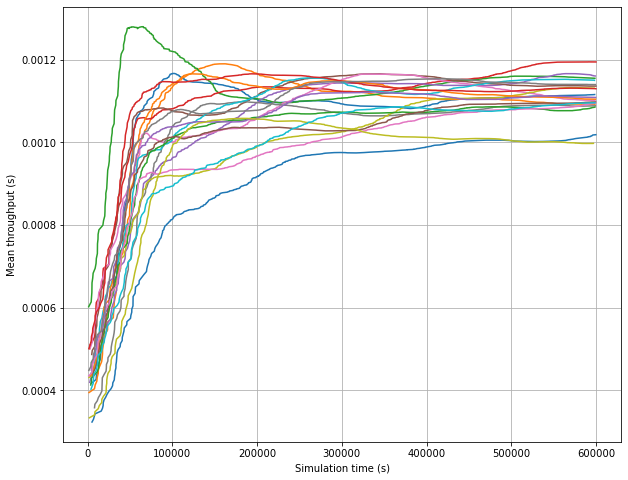

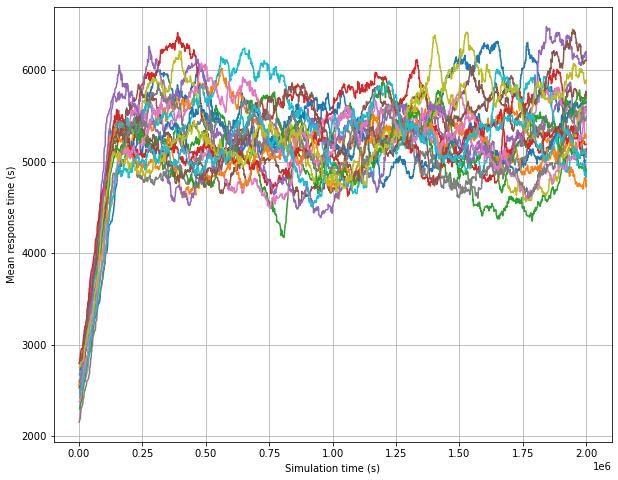

In [9]:
runs = find_runs({'**.interarrivalTimeAvg': 900.0})
plot_throughput(runs)
plot_rt(runs)

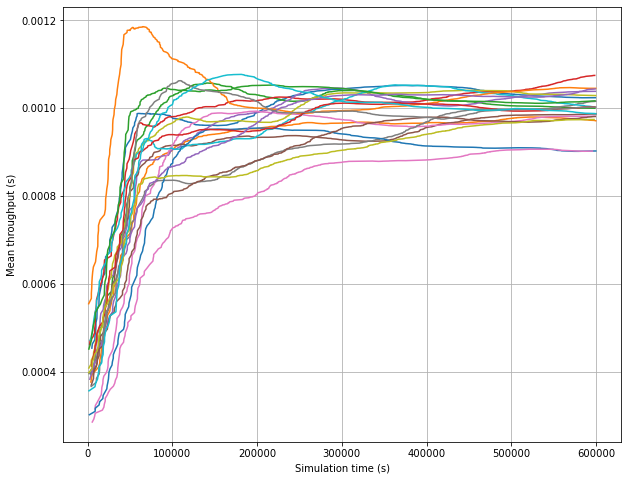

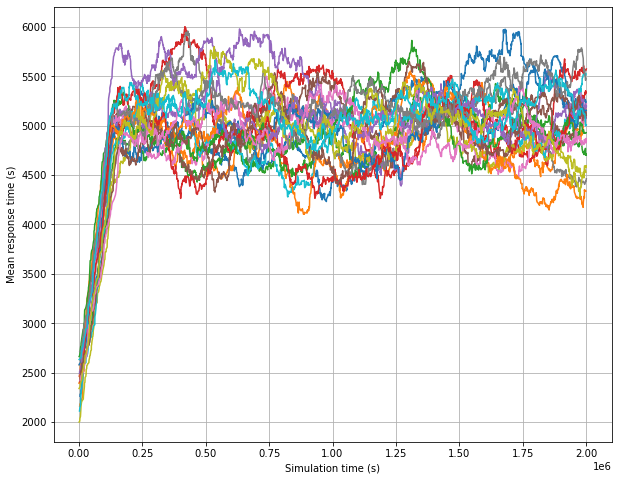

In [10]:
runs = find_runs({'**.interarrivalTimeAvg': 1000.0})
plot_throughput(runs)
plot_rt(runs)

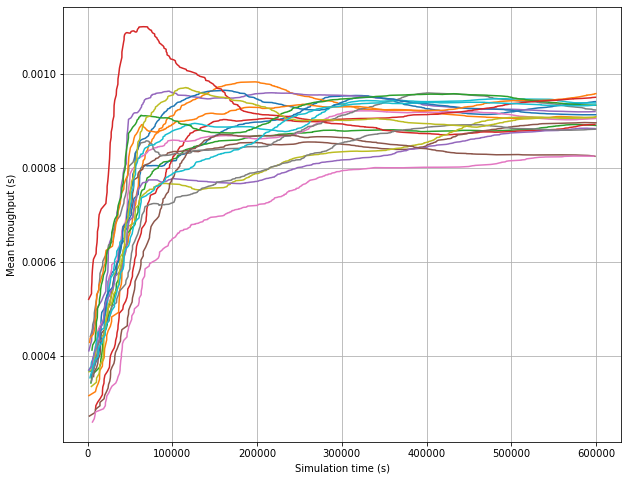

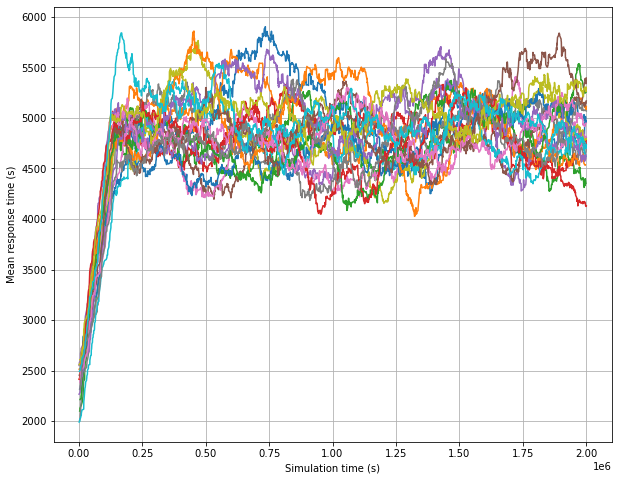

In [11]:
runs = find_runs({'**.interarrivalTimeAvg': 1100.0})
plot_throughput(runs)
plot_rt(runs)

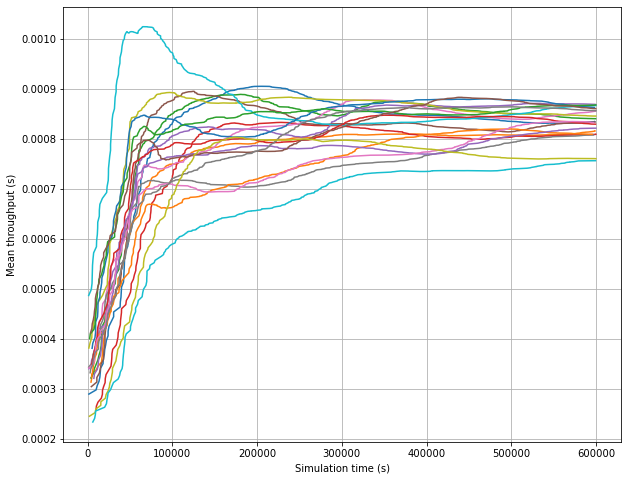

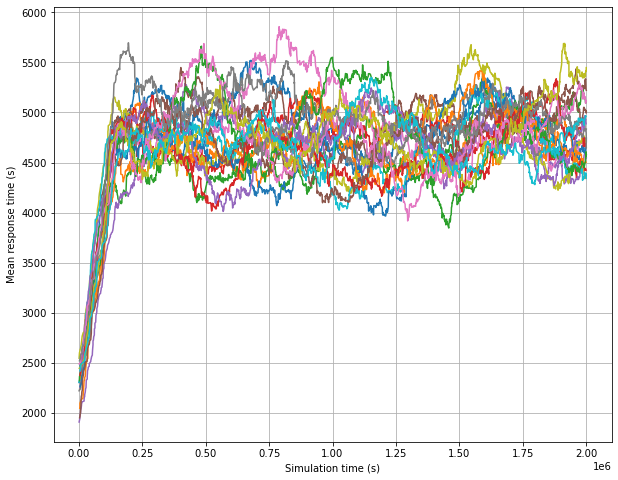

In [12]:
runs = find_runs({'**.interarrivalTimeAvg': 1200.0})
plot_throughput(runs)
plot_rt(runs)